In [25]:
from __future__ import print_function
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
# install xlrd
# !pip install xlrd

In [26]:
#df = pd.read_excel(
#    'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.xlsx',
#    sheet_name='Canada by Citizenship', skiprows=range(20), skipfooter=2)
#df.drop(columns=['Unnamed: 43', 'Unnamed: 44', 'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48', 'Unnamed: 49', 'Unnamed: 50', ], inplace=True)
df_can = pd.read_excel('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.xlsx', sheet_name='Canada by Citizenship', skiprows=range(20), skipfooter=2)

# remove some columns
df_can.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)

# and rename others
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace=True)

# calculate Total for each country (based on numeric columns only)
df_can['Total'] = df_can.select_dtypes(include=['int64','float64']).sum(axis=1)
df_can.set_index('Country', inplace=True)
df_can.index.name = None

Text(0.5, 0, 'Years')

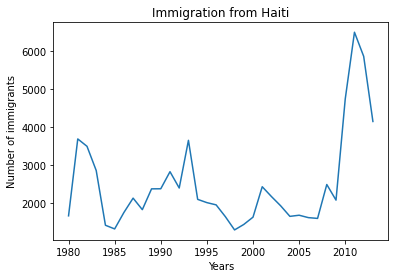

In [27]:
#years = list(map(str, range(1980, 2014)))
years = list(range(1980, 2014))
df_can.loc['Haiti', years].plot(kind='line')
plt.title('Immigration from Haiti')
plt.ylabel('Number of immigrants')
plt.xlabel('Years')
#plt.show()

In [35]:
df_CI = df_can.loc[['India', 'China'], years]
df_CI.head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
India,8880,8670,8147,7338,5704,4211,7150,10189,11522,10343,...,28235,36210,33848,28742,28261,29456,34235,27509,30933,33087
China,5123,6682,3308,1863,1527,1816,1960,2643,2758,4323,...,36619,42584,33518,27642,30037,29622,30391,28502,33024,34129


In [37]:
# transpose dataframe to make years the observation
df_CI = df_CI.transpose()
df_CI.head()

,India,China
1980,8880,5123
1981,8670,6682
1982,8147,3308
1983,7338,1863
1984,5704,1527


Text(0.5, 0, 'Years')

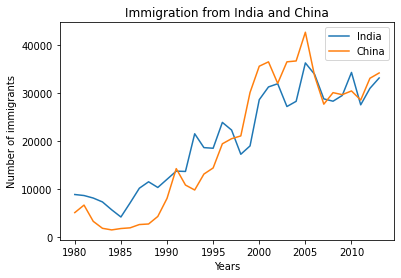

In [38]:
df_CI.plot(kind='line')
plt.title('Immigration from India and China')
plt.ylabel('Number of immigrants')
plt.xlabel('Years')